In [1]:
#1
#=
npv_ciam.ipynb: downscaling segments in the US Gulf coast then running them through 
CIAM, creating CSV's of data output including net present value optimal, optimal cost,
no adapt cost, and optimal adaptation strategy
for the outputs, the rows are the segements, and the columns are typically models/trials from Herman's data
=#

using MimiCIAM
using Mimi
using PlotlyJS
using NetCDF
using CSV
using DataFrames

WebIO._IJuliaInit()

In [2]:
#2
include("downscaling.jl")

downscale_brick (generic function with 4 methods)

Getting the segments/data files

In [22]:
#4
#reading the segment file
segment_file = CSV.read("diva_segment_latlon.csv", DataFrame)


Row,segments,segid,longi,lati
,String31,Int64,Float64,Float64
1,Canada5106,5106,-122.645,75.918
2,Canada5115,5115,-121.031,75.891
3,Canada5120,5120,-116.799,77.534
4,Canada5132,5132,-118.191,75.968
5,Canada5166,5166,-115.022,74.963
6,Canada5167,5167,-114.982,75.853
7,Canada5202,5202,-115.077,77.939
8,Canada5168,5168,-112.533,74.995
9,Canada5169,5169,-112.433,76.163


In [23]:
#5
#get the segments on the gulf coast
segment_gulf_list = []
for i in range(1, size(segment_file,1))
    lon = segment_file[i,3]
    lat = segment_file[i,4]
    name = segment_file[i,1]
    if lon >= -98 && lon <= -80.551 && lat >= 25 && lat <= 31 && name[1:12] == "UnitedStates"
        if !((lat >= 29.145 && lon >= -81.48) ||  (lat >= 28.069 && lon >= -80.961))
            push!(segment_gulf_list, [name, lon, lat])
        end
    end
end


segment_gulf_list


179-element Vector{Any}:
 Any[String31("UnitedStates4569"), -87.39, 30.47]
 Any[String31("UnitedStates4592"), -87.961, 30.675]
 Any[String31("UnitedStates4593"), -87.917, 30.604]
 Any[String31("UnitedStates4594"), -87.911, 30.562]
 Any[String31("UnitedStates4595"), -87.923, 30.521]
 Any[String31("UnitedStates4596"), -87.944, 30.227]
 Any[String31("UnitedStates4599"), -88.156, 30.324]
 Any[String31("UnitedStates4600"), -88.063, 30.615]
 Any[String31("UnitedStates4601"), -88.031, 30.679]
 Any[String31("UnitedStates4615"), -88.443, 30.329]
 ⋮
 Any[String31("UnitedStates4653"), -93.908, 29.896]
 Any[String31("UnitedStates4654"), -93.885, 29.933]
 Any[String31("UnitedStates5591"), -94.831, 29.332]
 Any[String31("UnitedStates5592"), -94.82, 29.338]
 Any[String31("UnitedStates5593"), -94.801, 29.328]
 Any[String31("UnitedStates5594"), -94.783, 29.315]
 Any[String31("UnitedStates5595"), -94.8, 29.298]
 Any[String31("UnitedStates5596"), -94.821, 29.283]
 Any[String31("UnitedStates5597"), -94.84

In [24]:
#6
#get the longitudes and latitudes of the segments
gulf_lat = []
gulf_lon = []
for n in segment_gulf_list
    push!(gulf_lon, n[2])
    push!(gulf_lat, n[3])
end

In [25]:
#7
#get rid of invalid segments
function delete_east_coast(gulf_list, lon, lat)
    for i in range(1, length(gulf_list)-1)
        if gulf_list[i][2] == lon && gulf_list[i][3] == lat
            deleteat!(gulf_list, i)
        end
    end
end

delete_east_coast(segment_gulf_list, -80.551, 25.244)



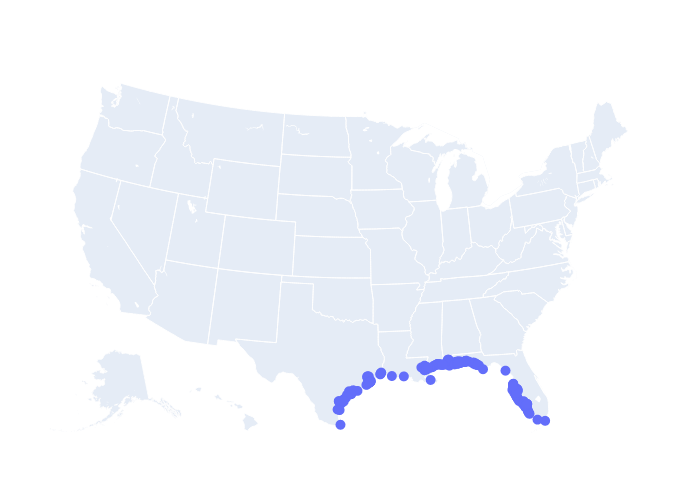

In [26]:
#8
#create a map of the segments
function maps1()
    marker = attr(size=10,
                 
                  )
    trace = scattergeo(;mode="markers", lat = gulf_lat, lon = gulf_lon,
                        marker=marker, name="Gulf Data")
    layout = Layout(geo_scope="usa", geo_resolution=50, width=500, height=550,
                    margin=attr(l=0, r=0, t=10, b=0))
    PlotlyJS.plot(trace, layout)
end
maps1()


In [27]:
#9
segment_gulf_list

178-element Vector{Any}:
 Any[String31("UnitedStates4569"), -87.39, 30.47]
 Any[String31("UnitedStates4592"), -87.961, 30.675]
 Any[String31("UnitedStates4593"), -87.917, 30.604]
 Any[String31("UnitedStates4594"), -87.911, 30.562]
 Any[String31("UnitedStates4595"), -87.923, 30.521]
 Any[String31("UnitedStates4596"), -87.944, 30.227]
 Any[String31("UnitedStates4599"), -88.156, 30.324]
 Any[String31("UnitedStates4600"), -88.063, 30.615]
 Any[String31("UnitedStates4601"), -88.031, 30.679]
 Any[String31("UnitedStates4615"), -88.443, 30.329]
 ⋮
 Any[String31("UnitedStates4653"), -93.908, 29.896]
 Any[String31("UnitedStates4654"), -93.885, 29.933]
 Any[String31("UnitedStates5591"), -94.831, 29.332]
 Any[String31("UnitedStates5592"), -94.82, 29.338]
 Any[String31("UnitedStates5593"), -94.801, 29.328]
 Any[String31("UnitedStates5594"), -94.783, 29.315]
 Any[String31("UnitedStates5595"), -94.8, 29.298]
 Any[String31("UnitedStates5596"), -94.821, 29.283]
 Any[String31("UnitedStates5597"), -94.84

In [28]:
#10
hcat(segment_gulf_list)

178×1 Matrix{Vector{Any}}:
 [String31("UnitedStates4569"), -87.39, 30.47]
 [String31("UnitedStates4592"), -87.961, 30.675]
 [String31("UnitedStates4593"), -87.917, 30.604]
 [String31("UnitedStates4594"), -87.911, 30.562]
 [String31("UnitedStates4595"), -87.923, 30.521]
 [String31("UnitedStates4596"), -87.944, 30.227]
 [String31("UnitedStates4599"), -88.156, 30.324]
 [String31("UnitedStates4600"), -88.063, 30.615]
 [String31("UnitedStates4601"), -88.031, 30.679]
 [String31("UnitedStates4615"), -88.443, 30.329]
 ⋮
 [String31("UnitedStates4653"), -93.908, 29.896]
 [String31("UnitedStates4654"), -93.885, 29.933]
 [String31("UnitedStates5591"), -94.831, 29.332]
 [String31("UnitedStates5592"), -94.82, 29.338]
 [String31("UnitedStates5593"), -94.801, 29.328]
 [String31("UnitedStates5594"), -94.783, 29.315]
 [String31("UnitedStates5595"), -94.8, 29.298]
 [String31("UnitedStates5596"), -94.821, 29.283]
 [String31("UnitedStates5597"), -94.848, 29.263]

In [29]:
#11
#create csv of segment names
gulf_segments = []
function add_name(entry)
    push!(gulf_segments, entry[1])
end


add_name.(segment_gulf_list)

CSV.write("gulf_segments.csv", DataFrame(hcat(gulf_segments), :auto))


"gulf_segments.csv"

In [30]:
#12
#create array of lonlat tuples

lonlat_gulf = []
function lonlat_tuples(entry)
    push!(lonlat_gulf, (entry[2], entry[3]))
end



lonlat_tuples (generic function with 1 method)

In [31]:
#13
lonlat_tuples.(segment_gulf_list)

178-element Vector{Vector{Any}}:
 [(-87.39, 30.47), (-87.961, 30.675), (-87.917, 30.604), (-87.911, 30.562), (-87.923, 30.521), (-87.944, 30.227), (-88.156, 30.324), (-88.063, 30.615), (-88.031, 30.679), (-88.443, 30.329)  …  (-93.935, 29.854), (-93.908, 29.896), (-93.885, 29.933), (-94.831, 29.332), (-94.82, 29.338), (-94.801, 29.328), (-94.783, 29.315), (-94.8, 29.298), (-94.821, 29.283), (-94.848, 29.263)]
 [(-87.39, 30.47), (-87.961, 30.675), (-87.917, 30.604), (-87.911, 30.562), (-87.923, 30.521), (-87.944, 30.227), (-88.156, 30.324), (-88.063, 30.615), (-88.031, 30.679), (-88.443, 30.329)  …  (-93.935, 29.854), (-93.908, 29.896), (-93.885, 29.933), (-94.831, 29.332), (-94.82, 29.338), (-94.801, 29.328), (-94.783, 29.315), (-94.8, 29.298), (-94.821, 29.283), (-94.848, 29.263)]
 [(-87.39, 30.47), (-87.961, 30.675), (-87.917, 30.604), (-87.911, 30.562), (-87.923, 30.521), (-87.944, 30.227), (-88.156, 30.324), (-88.063, 30.615), (-88.031, 30.679), (-88.443, 30.329)  …  (-93.935, 29.8

In [32]:
#14
CSV.write("segment_data_gulf.csv", DataFrame((segment_gulf_list), :auto))

"segment_data_gulf.csv"

Reading segment data created

In [33]:
#16
gulf_segments = CSV.read("gulf_segments.csv", DataFrame)

Row,x1
,String31
1,UnitedStates4569
2,UnitedStates4592
3,UnitedStates4593
4,UnitedStates4594
5,UnitedStates4595
6,UnitedStates4596
7,UnitedStates4599
8,UnitedStates4600
9,UnitedStates4601


In [35]:
#17 - TW commented out since we have it from above
#segment_data_gulf = Matrix(CSV.read("segment_data_gulf.csv", DataFrame))
#lonlat_gulf = lonlat_tuples.(segment_data_gulf[:,1])

In [36]:
#18
years = []
for i in range(2000, 2100)
    push!(years, i)
end
years

101-element Vector{Any}:
 2000
 2001
 2002
 2003
 2004
 2005
 2006
 2007
 2008
 2009
    ⋮
 2092
 2093
 2094
 2095
 2096
 2097
 2098
 2099
 2100

In [37]:
#19
ais_126_f = CSV.read("SLR_Manip/ais_126_f.csv", DataFrame)
ais_245_f = CSV.read("SLR_Manip/ais_245_f.csv", DataFrame)
ais_585_f = CSV.read("SLR_Manip/ais_585_f.csv", DataFrame)

gsic_126_f = CSV.read("SLR_Manip/gsic_126_f.csv", DataFrame)
gsic_245_f = CSV.read("SLR_Manip/gsic_245_f.csv", DataFrame)
gsic_585_f = CSV.read("SLR_Manip/gsic_585_f.csv", DataFrame)

gis_126_f = CSV.read("SLR_Manip/gis_126_f.csv", DataFrame)
gis_245_f = CSV.read("SLR_Manip/gis_245_f.csv", DataFrame)
gis_585_f = CSV.read("SLR_Manip/gis_585_f.csv", DataFrame)

te_126_f = CSV.read("SLR_Manip/te_126_f.csv", DataFrame)
te_245_f = CSV.read("SLR_Manip/te_245_f.csv", DataFrame)
te_585_f = CSV.read("SLR_Manip/te_585_f.csv", DataFrame)

lws_126_f = CSV.read("SLR_Manip/lws_126_f.csv", DataFrame)
lws_245_f = CSV.read("SLR_Manip/lws_245_f.csv", DataFrame)
lws_585_f = CSV.read("SLR_Manip/lws_585_f.csv", DataFrame)

gmsl_126_f = CSV.read("SLR_Manip/gmsl_126_f.csv", DataFrame)
gmsl_245_f = CSV.read("SLR_Manip/gmsl_245_f.csv", DataFrame)
gmsl_585_f = CSV.read("SLR_Manip/gmsl_585_f.csv", DataFrame)

comp_126_f = (years, Matrix(ais_126_f), Matrix(gsic_126_f), Matrix(gis_126_f), Matrix(te_126_f), Matrix(lws_126_f), Matrix(gmsl_126_f))
comp_245_f = (years, Matrix(ais_245_f), Matrix(gsic_245_f), Matrix(gis_245_f), Matrix(te_245_f), Matrix(lws_245_f), Matrix(gmsl_245_f))
comp_585_f = (years, Matrix(ais_585_f), Matrix(gsic_585_f), Matrix(gis_585_f), Matrix(te_585_f), Matrix(lws_585_f), Matrix(gmsl_585_f))




(Any[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009  …  2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100], [0.0 0.0 … 0.0 0.0; 0.0003260374 0.0002537924 … 0.00024710596 0.00038808212; … ; 0.04555356 -0.07675396 … -0.03303323 0.052680783; 0.0459697 -0.07868025 … -0.034135573 0.053264655], [0.0 0.0 … 0.0 0.0; 0.0014742017 0.0011917129 … 0.0004845634 0.0005354062; … ; 0.29003167 0.2646354 … 0.11849396 0.19064906; 0.2946288 0.26862592 … 0.12048447 0.19371164], [0.0 0.0 … 0.0 0.0; 0.000864625 0.0006325841 … 0.00041811168 0.0006416142; … ; 0.20649433 0.19500552 … 0.09636293 0.18350585; 0.213119 0.1998982 … 0.0984565 0.18839173], [0.0 0.0 … 0.0 0.0; 0.0011696294 0.0013360195 … 0.0009175278 0.0008236617; … ; 0.37342414 0.34341833 … 0.28293064 0.3863412; 0.37943107 0.3488977 … 0.28767407 0.39364475], [0.0 0.0 … 0.0 0.0; 0.0003678553341318006 0.0003678553341318006 … 0.0003678553341318006 0.0003678553341318006; … ; 0.047035541871397274 0.047035541871397274 … 0.04703554187139

Functions

In [38]:
#21
#function to get npv 
function run_ciam_npv(model, model_name, lslr, segments)

    NPV_array = []
    sub_array = []
    #array with columsn being models/trials (model 1 trial 1, model 2 trial 1, etc..)
    #cols are segments
    update_param!(model, :slrcost, :ntsteps, 11)
    update_param!(model, :slrcost, :at, [0; 0; 0; 1; 5])
    MimiCIAM.run(model)

    
    
        for i in range(1,20000)
            lslr_trial = lslr[i, :]
            for k in range(1, length(segments)-1)
                lslr_trial = hcat(lslr_trial, lslr[(20000 * k) + i, :])
            end
            update_param!(model, :slrcost, :lslr, lslr_trial)
            run(model)
            if i == 1
                NPV_array = model[:slrcost, :NPVOptimal]
            else
                NPV_array = hcat(NPV_array,  model[:slrcost, :NPVOptimal])
                
            end
        end
    

    #NPV_array rows = trials, columns = models

    CSV.write(string(model_name, ".csv"), DataFrame(NPV_array, :auto))
    return NPV_array
end




run_ciam_npv (generic function with 1 method)

In [39]:
#22
#=
Run ciam just to get output of optimal cost and no adapt cost

=#
function run_ciam_opna(model, model_name_op, model_name_na, lslr, segments)

    op_array_2050 = []
    op_array_2100 = []
    na_array_2050 = []
    na_array_2100 = []

    update_param!(model, :slrcost, :ntsteps, 11)
    update_param!(model, :slrcost, :at, [0; 0; 0; 1; 5])
    MimiCIAM.run(model)

    
    
        for i in range(1,20000)
            lslr_trial = lslr[i, :]
            for k in range(1, length(segments)-1)
                lslr_trial = hcat(lslr_trial, lslr[(20000 * k) + i, :])
            end
            update_param!(model, :slrcost, :lslr, lslr_trial)
            run(model)
            if i == 1
                op_array_2050 = model[:slrcost, :OptimalCost][6,:]
                op_array_2100 = model[:slrcost, :OptimalCost][11,:]
                na_array_2050 = model[:slrcost, :NoAdaptCost][6,:]
                na_array_2100 = model[:slrcost, :NoAdaptCost][11,:]
            else
                op_array_2050 = hcat(op_array_2050, model[:slrcost, :OptimalCost][6,:])
                op_array_2100 = hcat(op_array_2100, model[:slrcost, :OptimalCost][11,:])
                na_array_2050 = hcat(na_array_2050, model[:slrcost, :NoAdaptCost][6,:])
                na_array_2100 = hcat(na_array_2100, model[:slrcost, :NoAdaptCost][11,:])
            end 
        end
    

   

    CSV.write(string(model_name_op, "2050.csv"), DataFrame(op_array_2050, :auto))
    CSV.write(string(model_name_op, "2100.csv"), DataFrame(op_array_2100, :auto))
    CSV.write(string(model_name_na, "2050.csv"), DataFrame(na_array_2050, :auto))
    CSV.write(string(model_name_na, "2100.csv"), DataFrame(na_array_2100, :auto))
    return op_array_2050, op_array_2100, na_array_2050, na_array_2100
end

run_ciam_opna (generic function with 1 method)

In [68]:
#22
#=
Combined function that gets npv, optimal, and no adapt cost in same loop 
@param model = given ciam model
@param ssprcp = ssprcp scenario 
@param lslr = local sea level rise data for segments
@param segments = list of segments
@return tuple matrices for optimal cost 2050 and 2100, no adapt cost 2050 and 2100, net present value, and optimal strategy
=#

function run_ciam_data(model, ssprcp, lslr, segments)

    # op_array/na_array = rows are segments, columns are models/trial
    #npv_array = rows are segments, columns are models/trials 
    #optimal_adapt = rows are segemnts, columns are models/trials
    op_array_2050 = []
    op_array_2100 = []
    na_array_2050 = []
    na_array_2100 = []
    npv_array = []
    optimal_adapt = []

    update_param!(model, :slrcost, :ntsteps, 11)
    update_param!(model, :slrcost, :at, [0; 0; 0; 1; 5])
    MimiCIAM.run(model)

    
    
        for i in range(1,20000)
            lslr_trial = lslr[i, :]
            for k in range(1, nrow(segments)-1)
                lslr_trial = hcat(lslr_trial, lslr[(20000 * k) + i, :])
            end
            update_param!(model, :slrcost, :lslr, lslr_trial)
            run(model)
            optadapt_temp = []
            for k in range(1, nrow(segments))
                op_cost = model[:slrcost, :OptimalCost][1,k]
                if op_cost == model[:slrcost, :ProtectCost][:,:,1][1,k]
                    push!(optadapt_temp, "Protect-1")
                elseif op_cost == model[:slrcost, :ProtectCost][:,:,2][1,k]
                    push!(optadapt_temp, "Protect-2")
                elseif op_cost == model[:slrcost, :ProtectCost][:,:,3][1,k]
                    push!(optadapt_temp, "Protect-3")
                elseif op_cost == model[:slrcost, :ProtectCost][:,:,4][1,k]
                    push!(optadapt_temp, "Protect-4")
                elseif op_cost == model[:slrcost, :ProtectCost][:,:,5][1,k]
                    push!(optadapt_temp, "Protect-5")
                elseif op_cost == model[:slrcost, :RetreatCost][:,:,1][1,k]
                    push!(optadapt_temp, "Retreat-1")
                elseif op_cost == model[:slrcost, :RetreatCost][:,:,2][1,k]
                    push!(optadapt_temp, "Retreat-2")
                elseif op_cost == model[:slrcost, :RetreatCost][:,:,3][1,k]
                    push!(optadapt_temp, "Retreat-3")
                elseif op_cost == model[:slrcost, :RetreatCost][:,:,4][1,k]
                    push!(optadapt_temp, "Retreat-4")
                elseif op_cost == model[:slrcost, :RetreatCost][:,:,5][1,k]
                    push!(optadapt_temp, "Retreat-5")
                elseif op_cost == model[:slrcost, :RetreatCost][:,:,6][1,k]
                    push!(optadapt_temp, "Retreat-6")
                else 
                    push!(optadapt_temp, "None?")
                end
            end
            
            if i == 1
                optimal_adapt = optadapt_temp
                
                op_array_2050 = model[:slrcost, :OptimalCost][6,:]
                op_array_2100 = model[:slrcost, :OptimalCost][11,:]
                na_array_2050 = model[:slrcost, :NoAdaptCost][6,:]
                na_array_2100 = model[:slrcost, :NoAdaptCost][11,:]
                
                npv_array = model[:slrcost, :NPVOptimal]
                
            else
                optimal_adapt = hcat(optimal_adapt, optadapt_temp)
                
                op_array_2050 = hcat(op_array_2050, model[:slrcost, :OptimalCost][6,:])
                op_array_2100 = hcat(op_array_2100, model[:slrcost, :OptimalCost][11,:])
                na_array_2050 = hcat(na_array_2050, model[:slrcost, :NoAdaptCost][6,:])
                na_array_2100 = hcat(na_array_2100, model[:slrcost, :NoAdaptCost][11,:])

                npv_array = hcat(npv_array,  model[:slrcost, :NPVOptimal])
                
            end
        end
    

    
    CSV.write(string("OptimalCost_Gulf_2050_", ssprcp, ".csv"), DataFrame(op_array_2050, :auto))
    CSV.write(string("OptimalCost_Gulf_2100_", ssprcp, ".csv"), DataFrame(op_array_2100, :auto))
    CSV.write(string("NoAdaptCost_Gulf_2050_", ssprcp, ".csv"), DataFrame(na_array_2050, :auto))
    CSV.write(string("NoAdaptCost_Gulf_2100_", ssprcp, ".csv"), DataFrame(na_array_2100, :auto))
    CSV.write(string("NPVOptimal_Gulf_", ssprcp, ".csv"), DataFrame(npv_array, :auto))
    CSV.write(string("OptimalStrategy_Gulf_", ssprcp, ".csv"), DataFrame(optimal_adapt, :auto))
    return op_array_2050, op_array_2100, na_array_2050, na_array_2100, npv_array, optimal_adapt 
end

run_ciam_data (generic function with 1 method)

Testing with smaller segment list of size 10 (downscale + NPV Optimal)

In [41]:
#24
#testing downscaling with smaller segment list


ensembles_run = 1:20000
lonlat_test = lonlat_gulf[1:10]
segments_test = gulf_segments[1:10]

CSV.write("gulf_segments_test.csv", DataFrame(hcat(gulf_segments[1:10]), :auto))

result_245_test = downscale_brick(comp_245_f, lonlat_test, ensembles_run, 2000, 2100, 10)
lslr_245_test = result_245_test[1]
file_test_downscale_245 = lslr_245_test[:,:,1]
for i in range(2, 10)
    file_test_downscale_245 = vcat(file_test_downscale_245, lslr_245_test[:,:,i])
end


file_test_downscale_245



MethodError: MethodError: no method matching getindex(::DataFrame, ::UnitRange{Int64})
Closest candidates are:
  getindex(::DataFrame, ::AbstractVector{T}, !Matched::Colon) where T at ~/.julia/packages/DataFrames/LteEl/src/dataframe/dataframe.jl:599
  getindex(::DataFrame, ::AbstractVector{T}, !Matched::Union{Colon, Regex, AbstractVector, All, Between, Cols, InvertedIndex}) where T at ~/.julia/packages/DataFrames/LteEl/src/dataframe/dataframe.jl:573
  getindex(::DataFrame, ::AbstractVector, !Matched::Union{AbstractString, Signed, Symbol, Unsigned}) at ~/.julia/packages/DataFrames/LteEl/src/dataframe/dataframe.jl:524
  ...

In [17]:
#25
 segments_test = CSV.read("gulf_segments_test.csv", DataFrame)
 #lslr_gulf_test_245 = hcat(file_test_downscale_245, zeros(200000, 9))


Row,x1
,String31
1,UnitedStates4569
2,UnitedStates4592
3,UnitedStates4593
4,UnitedStates4594
5,UnitedStates4595
6,UnitedStates4596
7,UnitedStates4599
8,UnitedStates4600
9,UnitedStates4601


In [258]:
#26
CSV.write("lslr_245_downscale_gulf_test.csv", DataFrame(file_test_downscale, :auto))


"lslr_245_downscale_gulf_test.csv"

In [19]:
lslr_gulf_test_245 = CSV.read("lslr_245_downscale_gulf_test.csv", DataFrame)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0350941,0.080411,0.136169,0.196454,0.264169,0.337937,0.419782,0.500921,0.584177,0.669606
2,0.0,0.0422987,0.0827127,0.132987,0.182701,0.238451,0.290831,0.347904,0.408144,0.464899,0.525093
3,0.0,0.0249345,0.063229,0.111671,0.169442,0.236429,0.310663,0.391852,0.476952,0.56746,0.660453
4,0.0,0.0271551,0.0615151,0.102147,0.147142,0.193671,0.246445,0.302567,0.359151,0.417764,0.475192
5,0.0,0.0314169,0.0685198,0.111001,0.158463,0.20867,0.262964,0.319279,0.376613,0.436782,0.492838
6,0.0,0.0312099,0.0710677,0.118176,0.173391,0.235866,0.303765,0.378385,0.45604,0.541209,0.630248
7,0.0,0.0396245,0.0883291,0.143877,0.202105,0.265218,0.335872,0.407135,0.482134,0.55727,0.632866
8,0.0,0.0331653,0.0792602,0.131044,0.182711,0.24502,0.312247,0.381089,0.451935,0.521624,0.595553
9,0.0,0.0301396,0.0740255,0.12106,0.171704,0.230936,0.296211,0.365213,0.435707,0.51023,0.586886


In [21]:
lslr_gulf_test_245

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0350941,0.080411,0.136169,0.196454,0.264169,0.337937,0.419782,0.500921,0.584177,0.669606
2,0.0,0.0422987,0.0827127,0.132987,0.182701,0.238451,0.290831,0.347904,0.408144,0.464899,0.525093
3,0.0,0.0249345,0.063229,0.111671,0.169442,0.236429,0.310663,0.391852,0.476952,0.56746,0.660453
4,0.0,0.0271551,0.0615151,0.102147,0.147142,0.193671,0.246445,0.302567,0.359151,0.417764,0.475192
5,0.0,0.0314169,0.0685198,0.111001,0.158463,0.20867,0.262964,0.319279,0.376613,0.436782,0.492838
6,0.0,0.0312099,0.0710677,0.118176,0.173391,0.235866,0.303765,0.378385,0.45604,0.541209,0.630248
7,0.0,0.0396245,0.0883291,0.143877,0.202105,0.265218,0.335872,0.407135,0.482134,0.55727,0.632866
8,0.0,0.0331653,0.0792602,0.131044,0.182711,0.24502,0.312247,0.381089,0.451935,0.521624,0.595553
9,0.0,0.0301396,0.0740255,0.12106,0.171704,0.230936,0.296211,0.365213,0.435707,0.51023,0.586886


In [22]:
lslr_gulf_test_245 = hcat(Matrix(lslr_gulf_test_245), zeros(200000, 9))

200000×20 Matrix{Float64}:
 0.0  0.0350941  0.080411   0.136169   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0422987  0.0827127  0.132987      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0249345  0.063229   0.111671      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0271551  0.0615151  0.102147      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0314169  0.0685198  0.111001      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0312099  0.0710677  0.118176   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0396245  0.0883291  0.143877      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0331653  0.0792602  0.131044      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0301396  0.0740255  0.12106       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0415876  0.09383    0.153228      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0286687  0.059986   0.0984578  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.030515   0.0601962  0.0981188     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0381986  0.0791879  0.126181      0.0  0.0  0.0  0.0 

In [23]:
#27
#test run
run_name = "NPV_Gulf_test_245"
subset_name = "C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/gulf_segments_test.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP2_v9_130219",
        :ssp_simplified  => 2
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)


model_245 = MimiCIAM.get_model(initfile="../NPV_Gulf_test_245_init.csv")
MimiCIAM.run(model_245)




In [24]:
#28
#testing npv function
#npv_245_test = run_ciam_npv(model_245, "NPVOptimal_245_Gulf_test", lslr_gulf_test_245, segments_test)
#testing optimal cost / no adapt cost function 
#opna_245_test = run_ciam_opna(model_245, "OptimalCost_Gulf_test", "NoAdaptCost_Gulf_test", lslr_gulf_test_245, segments_test)

data_245_test = run_ciam_data(model_245, 245, lslr_gulf_test_245, segments_test)

(Union{Missing, Float64}[0.0002445601980080521 0.00018959362372017384 … 0.00012612598033124122 0.00022421920146889864; 0.00770408840293099 0.006280943884604232 … 0.0046840535863759206 0.007156974019989106; … ; 0.0028342809671452612 0.002304753748220882 … 0.0017095625699596745 0.0026306328276561397; 0.032768658725411806 0.025033654996956374 … 0.015937244348220504 0.030308357757056793], Union{Missing, Float64}[0.0005736631458648036 0.0005186949309137613 … 0.0004550857563015761 0.0005533221292882899; 0.008929272160385528 0.0072581319292800515 … 0.0053560512843511005 0.008285409402983654; … ; 0.005744097891054593 0.004624028650495094 … 0.0033013665154120477 0.005310286289662697; 0.039794638155018665 0.028876697086505716 … 0.018047866761171306 0.03657005479471644], Union{Missing, Float64}[0.0006519599764728989 0.00047157594053959413 … 0.00021007467079228666 0.0005485303535051546; 0.06371959189173512 0.04700276961895314 … 0.03230743070269289 0.059071044971866826; … ; 0.050588952652192085 0.0

In [26]:
data_245_test[6]

10×20000 Matrix{Any}:
 "Retreat-1"  "Retreat-1"  "Retreat-1"  …  "Retreat-1"  "Retreat-1"
 "Protect-1"  "Protect-1"  "Protect-1"     "Protect-1"  "Protect-1"
 "Retreat-2"  "Retreat-2"  "Retreat-2"     "Retreat-2"  "Retreat-2"
 "Retreat-2"  "Retreat-2"  "Retreat-2"     "Retreat-2"  "Retreat-2"
 "Retreat-2"  "Retreat-2"  "Retreat-2"     "Retreat-2"  "Retreat-2"
 "Retreat-1"  "Retreat-1"  "Retreat-1"  …  "Retreat-1"  "Retreat-1"
 "Protect-1"  "Protect-1"  "Protect-1"     "Retreat-1"  "Protect-1"
 "Protect-1"  "Protect-1"  "Protect-1"     "Protect-1"  "Protect-1"
 "Protect-1"  "Protect-1"  "Protect-1"     "Protect-1"  "Protect-1"
 "Retreat-1"  "Retreat-1"  "Retreat-1"     "Retreat-1"  "Retreat-1"

Run all segments in the Gulf Coast

In [49]:
#30
#downscaling (all gulf segments)


ensembles_run = 1:20000


result_126_gulf = downscale_brick(comp_126_f, lonlat_gulf, ensembles_run, 2000, 2100, 10)
run_126_gulf = result_126_gulf[1]
lslr_126_gulf = run_126_gulf[:,:,1]
for i in range(2, nrow(gulf_segments))
    lslr_126_gulf = vcat(lslr_126_gulf, run_126_gulf[:,:,i])
end
CSV.write("lslr_126_downscale_gulf.csv", DataFrame(lslr_126_gulf, :auto))


result_245_gulf = downscale_brick(comp_245_f, lonlat_gulf, ensembles_run, 2000, 2100, 10)
run_245_gulf = result_245_gulf[1]
lslr_245_gulf = run_245_gulf[:,:,1]
for i in range(2, nrow(gulf_segments))
    lslr_245_gulf = vcat(lslr_245_gulf, run_245_gulf[:,:,i])
end
CSV.write("lslr_245_downscale_gulf.csv", DataFrame(lslr_245_gulf, :auto))


result_585_gulf = downscale_brick(comp_585_f, lonlat_gulf, ensembles_run, 2000, 2100, 10)
run_585_gulf = result_585_gulf[1]
lslr_585_gulf = run_585_gulf[:,:,1]
for i in range(2, nrow(gulf_segments))
    lslr_585_gulf = vcat(lslr_585_gulf, run_585_gulf[:,:,i])
end
CSV.write("lslr_585_downscale_gulf.csv", DataFrame(lslr_585_gulf, :auto))


"lslr_585_downscale_gulf.csv"

In [50]:
#31
lslr_126_gulf = Matrix(CSV.read("lslr_126_downscale_gulf.csv", DataFrame))
lslr_245_gulf = Matrix(CSV.read("lslr_245_downscale_gulf.csv", DataFrame))
lslr_585_gulf = Matrix(CSV.read("lslr_585_downscale_gulf.csv", DataFrame))

lslr_126_gulf = hcat(lslr_126_gulf, zeros(3560000, 9))
lslr_245_gulf = hcat(lslr_245_gulf, zeros(3560000, 9))
lslr_585_gulf = hcat(lslr_585_gulf, zeros(3560000, 9))


3560000×20 Matrix{Float64}:
 0.0  0.0433786  0.0903373  0.149018   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0382319  0.0796949  0.131742      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0297117  0.0698332  0.12245       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0340152  0.0678793  0.112909      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0361237  0.0737898  0.120489      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0342238  0.0740326  0.123319   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0411705  0.0903472  0.148705      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0396064  0.0855681  0.136849      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0360523  0.0792902  0.128054      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0501849  0.104336   0.166025      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                                     ⋱            ⋮                   
 0.0  0.0224536  0.04668    0.0752544     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0323197  0.0688451  0.114007      0.0  0.0  0.0  0.0  0

In [69]:
#32
run_name = "NPV_Gulf_126"
subset_name = "/Users/aewsma/codes/jup_jul_mimi_demo/mimiCIAM_demo/gulf_segments.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP1_v9_130219",
        :ssp_simplified  => 1
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)


model_126_gulf = MimiCIAM.get_model(initfile="../NPV_Gulf_126_init.csv")
MimiCIAM.run(model_126_gulf)   

data_126_gulf = run_ciam_data(model_126_gulf, 126, lslr_126_gulf, gulf_segments)

(Union{Missing, Float64}[0.0021019867651377957 0.0012234157422827694 … 0.0006910325177004871 0.0017351546100610393; 0.004471757596994171 0.0029565896558672988 … 0.0021914420171066217 0.004001440214942675; … ; 0.0014432013059220918 0.0009414820825971646 … 0.0006805760923465177 0.0012305677911892325; 0.0032968794388279835 0.0024678930552800844 … 0.002774514672303173 0.0030879495942125017], Union{Missing, Float64}[0.0033498685524022986 0.0024049317763936056 … 0.0018579954902100625 0.003013736373793995; 0.004691168099533086 0.0031582460257026513 … 0.002393326207415973 0.004224817731542818; … ; 0.0020081315941058754 0.0011018467054080456 … 0.0008330967779450089 0.001713555067399601; 0.012145938467128914 0.011303953656016493 … 0.002775669663462991 0.011936793918479578], Union{Missing, Float64}[0.003850548161749055 0.0022676157537664 … 0.0014469601068815684 0.00286302769730632; 0.06414113965070048 0.030652131974292306 … 0.011049768527700187 0.03774285973389428; … ; 0.024301571164190856 0.0230

In [70]:
#33
run_name = "NPV_Gulf_245"
subset_name = "/Users/aewsma/codes/jup_jul_mimi_demo/mimiCIAM_demo/gulf_segments.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP2_v9_130219",
        :ssp_simplified  => 2
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)


model_245_gulf = MimiCIAM.get_model(initfile="../NPV_Gulf_245_init.csv")
MimiCIAM.run(model_245_gulf)   

data_245_gulf = run_ciam_data(model_245_gulf, 245, lslr_245_gulf, gulf_segments)

(Union{Missing, Float64}[0.002475988103415502 0.0016908033482359891 … 0.0008531424338729802 0.002177216556859003; 0.005246199701283239 0.0038780197400754097 … 0.0025826286066598612 0.004836411262592967; … ; 0.001652322978976248 0.0011834791030045154 … 0.0007650414133008629 0.0014830338447149457; 0.003570450033840604 0.0030221969735855342 … 0.0029039798682177227 0.003391262051465054], Union{Missing, Float64}[0.0038192019286417533 0.0029523138572840673 … 0.0020538155489752004 0.0035159929177699164; 0.005495191087854679 0.004102935997493816 … 0.002791589639594311 0.005079665516819487; … ; 0.002983161497161775 0.001742992918572158 … 0.0010112843907737438 0.0025603326296622826; 0.012054028232247244 0.011505532900591565 … 0.002905088667992855 0.011874835392084681], Union{Missing, Float64}[0.0038255966373807776 0.0026037201713922046 … 0.0014343664118350494 0.003227438872312631; 0.05686565360197058 0.03711863637338426 … 0.01052899108834025 0.04082916608267243; … ; 0.023770806596704115 0.022611

In [71]:
#34
run_name = "NPV_Gulf_585"
subset_name = "/Users/aewsma/codes/jup_jul_mimi_demo/mimiCIAM_demo/gulf_segments.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP5_v9_130219",
        :ssp_simplified  => 5
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)


model_585_gulf = MimiCIAM.get_model(initfile="../NPV_Gulf_585_init.csv")
MimiCIAM.run(model_585_gulf)   

data_585_gulf = run_ciam_data(model_585_gulf, 585, lslr_585_gulf, gulf_segments)

(Union{Missing, Float64}[0.004663190648421874 0.0033077043839209214 … 0.0018722519320324138 0.004095523723669431; 0.009947757046644076 0.007499066663474012 … 0.005120404257090117 0.009104541289541045; … ; 0.002953118471647844 0.0021279070673222685 … 0.0013604283111708694 0.002591497609778547; 0.005492725372573254 0.0045678184069222385 … 0.00408864279163467 0.005154682168300094], Union{Missing, Float64}[0.007048253861403729 0.005875117362220303 … 0.004274955434311784 0.006558385268013347; 0.010399524537989245 0.007995927838056461 … 0.005561528730070094 0.00957405272811832; … ; 0.006958467586862675 0.0053769568831852745 … 0.0027870681225867404 0.0063026712665286465; 0.020013489948743926 0.019088582777236705 … 0.004090541030971075 0.019675446742524715], Union{Missing, Float64}[0.0074841311440357675 0.005134816176900057 … 0.0031337003080036912 0.0060213776152493615; 0.11352151731288167 0.06636658065688604 … 0.021950405676345472 0.07677958821401583; … ; 0.033877769232507106 0.03221629278825